### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v1.1

magd_client https://github.com/pnsn/magd_client/tree/v1.1

# Noise Study to compare current and notional EEW station geometry

In [47]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

# some constants for all plots

# path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

# params for all profiles
lat_min = 38.0
lat_max = 52.0
lon_min = -130.0
lon_max = -115.0
resolution = 0.1
num_solutions = 4
nyquist_correction = 0.4
mu = 3e11
qconst = 300.0
beta = 3.5

# create all data sources icons can be changed without rebuilding magD object
data_srcs = {'existing_bb':
             {
                 'csv_path': 'csv/2019_eew/existing_bb.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'Yellow',
                 'symbol': 'o',
                 'size': 10,
                 'label': "Existing BB",
                 'klass': 'scnl'
             },
             'existing_sm':
             {
                 'csv_path': 'csv/2019_eew/existing_sm.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'blue',
                 'symbol': 'o',
                 'size': 10,
                 'label': "Existing SM",
                 'klass': 'scnl'
             }
             }


def make_grid(grid_type, src):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max,
                num_solutions, nyquist_correction, mu, qconst, beta, pickle_path)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid




Working in /Users/joncon/Sites/magd_client


In [2]:
# only run once
# set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Station data

### Existing EEW contributing stations

ShakeAlert Coordinator provided two xls files, one current west coast eew, one notional west coast eew. Both files were edited in Numbers, where the SM and BB channels we're filtered to unique files:

* ./csv/2019_eew/existing_bb.csv 
* ./csv/2019_eew/existing_sm.csv
* ./csv/2019_eew/notional_bb.csv
* ./csv/2019_eew/notional_sm.csv

Headers were changed as needed:
* sta
* chan
* net
* location
* lat
* lon
* rate

## Create and save MagD

### Existing Broadbands

In [12]:
name = "2019_eew_existing_bb"
grid_type = 'detection'

existing_bb_src = {}
existing_bb_src['existing_bb'] = data_srcs['existing_bb']
%time grid_eew_existing_bb = make_grid(grid_type, existing_bb_src)
print(grid_eew_existing_bb.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
12 channel(s) found without noise pdf
Profiling by noise...
lat

### Existing Strong Motion

In [11]:
# Performance 47 minutes
# refactor 1 46 mins
name = "2019_eew_existing_sm"
grid_type = 'detection'

existing_sm_src = {}
existing_sm_src['existing_sm'] = data_srcs['existing_sm']
%time grid_eew_existing_sm = make_grid(grid_type, existing_sm_src)
print(grid_eew_existing_sm.get_path())

JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
CPW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
GSM:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MEGW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PGO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PSNS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TAKO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TKCO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TOLO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31

### Existing all

In [8]:
# performance 1 hour 4 min
# refactor 1 hour 4 min
name = "2019_eew_existing_all"
grid_type = 'detection'

src = {}
src['existing_sm'] = data_srcs['existing_sm']
src['existing_bb'] = data_srcs['existing_bb']
%time grid_eew_existing_all = make_grid(grid_type, src)
print(grid_eew_existing_all.get_path())

JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
CPW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
GSM:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MEGW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PGO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PSNS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TAKO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TKCO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TOLO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31

## Detection Maps

### Instantiate MagD objects
If needed, instantiate runs from above. This is useful when kernel has been restarted or mapping is done at a later time. Paths come from stdout from above runs. Ensure this path is updated if MagD is reran at different resolution.

In [13]:
# performance before refactor:
# Refactor 1
# 13 seconds
# 36 seconds
# 50 seconds
%time grid_eew_existing_bb = get_pickle(
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_bb/detection_grid/140x150-res-0.1.pickle")
%time grid_eew_existing_sm = get_pickle(
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_sm/detection_grid/140x150-res-0.1.pickle")
%time grid_eew_existing_all = get_pickle(
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_all/detection_grid/140x150-res-0.1.pickle")

CPU times: user 465 ms, sys: 22.8 ms, total: 488 ms
Wall time: 488 ms
CPU times: user 470 ms, sys: 13.5 ms, total: 483 ms
Wall time: 485 ms
CPU times: user 730 ms, sys: 9.74 ms, total: 739 ms
Wall time: 741 ms


### Existing Broadband


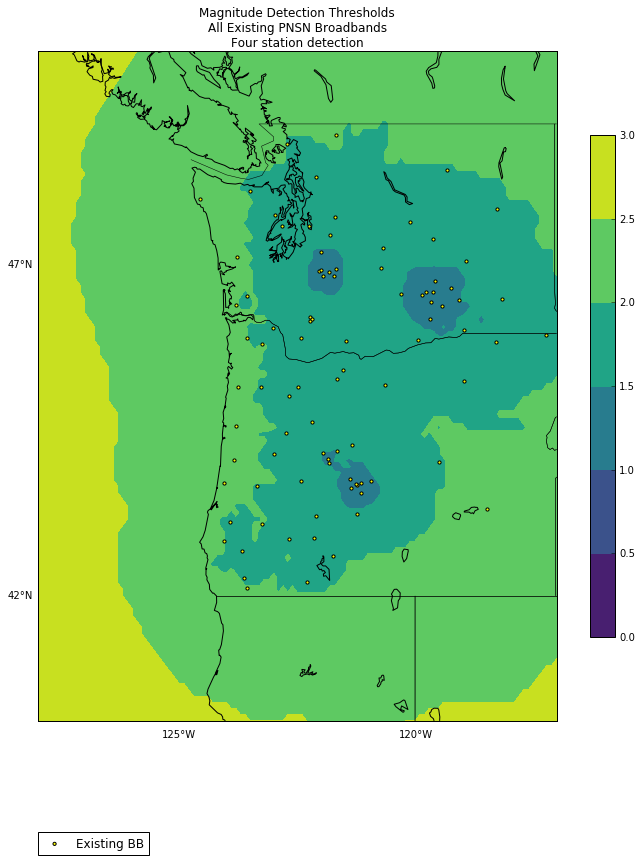

CPU times: user 2.87 s, sys: 47.9 ms, total: 2.91 s
Wall time: 2.92 s


In [41]:
# Performance 20 sec
# refactor 1 4.3 sec
path = grid_eew_existing_bb.get_path()

%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'All Existing PNSN Broadbands' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

## Existing Strong Motion

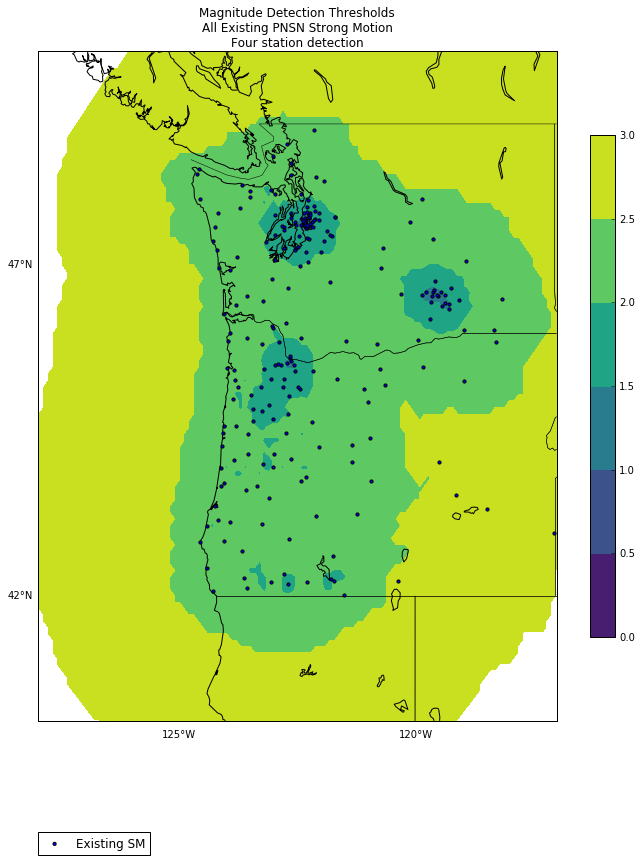

CPU times: user 3.37 s, sys: 41.7 ms, total: 3.41 s
Wall time: 3.41 s


In [39]:
# Performance : 51 sec
path = grid_eew_existing_sm.get_path()
%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'All Existing PNSN Strong Motion' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

## Existing All

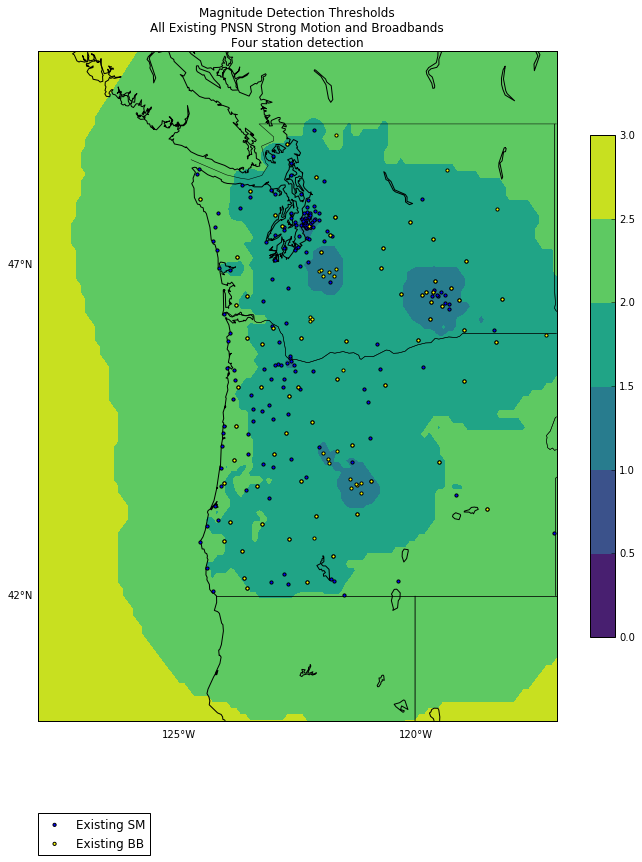

CPU times: user 3.37 s, sys: 37 ms, total: 3.4 s
Wall time: 3.41 s


In [40]:
# Performance 1.5 minutes
path = grid_eew_existing_all.get_path()
%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'All Existing PNSN Strong Motion and Broadbands' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

### Diff SM - all
Increase in performance using SM

Clone one grid and then set clones grid to diff of other two

In [16]:
# PERFORMANCE before solution refactor
# 14 mins
#  2 sec
# 40 sec

# After solution refactor: 11 min

%time grid_eew_existing_diff = grid_eew_existing_all.copy("existing_diff", "diff_all_sm")
%time grid_eew_existing_diff.matrix = grid_eew_existing_sm.matrix - grid_eew_existing_all.matrix
%time grid_eew_existing_diff.save()
print(grid_eew_existing_diff.get_path())

CPU times: user 2.06 s, sys: 20.9 ms, total: 2.08 s
Wall time: 2.08 s
CPU times: user 127 µs, sys: 18 µs, total: 145 µs
Wall time: 94.9 µs
CPU times: user 267 ms, sys: 10.1 ms, total: 277 ms
Wall time: 280 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_sm/existing_diff_grid/140x150-res-0.1.pickle


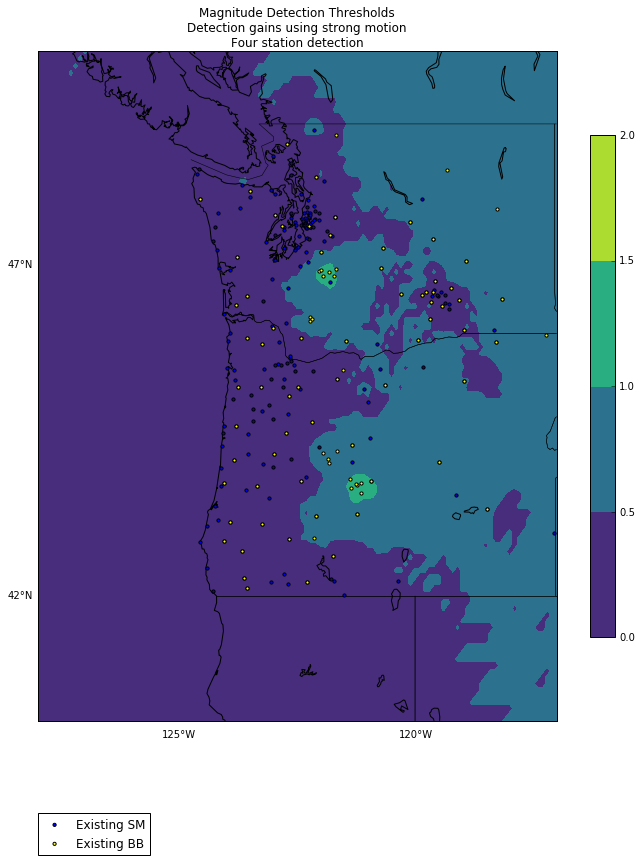

CPU times: user 3.22 s, sys: 35.4 ms, total: 3.25 s
Wall time: 3.25 s


In [43]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_diff.get_path()

%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'Detection gains using strong motion' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2

# Find a good station 
Look for station used in highest number of solutions for a proxy for future stations

In [23]:
scnls = grid_eew_existing_all.productive_scnls(10)

In [24]:
contribs = [s.contrib_solutions for s in scnls]
print(contribs)
template = scnls[0]
print(template.sta + ":" + template.chan +
      ":" + template.loc + ":" + template.net)

[6377, 5785, 5727, 5150, 5008, 4304, 4257, 4072, 3727, 3171]
TOOM:HHZ:--:UO


In [25]:
data_srcs['notional'] = {
    'csv_path': 'csv/2019_eew/notional.csv',
    'starttime': '2019-01-01',
    'endtime': '2019-03-31',
    'color': 'red',
    'symbol': '^',
    'size': 12,
    'label': 'Notional',
    'klass': 'scnl',
    'template_sta': template.sta,
    'template_chan': template.chan,
    'template_net': template.net,
    'template_loc': template.loc
}

In [26]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_notional"
grid_type = 'detection'

src = {}
src['notional'] = data_srcs['notional']

%time grid_eew_notional = make_grid(grid_type, src)
print(grid_eew_notional.get_path())

Profiling by noise...
lat: 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, Feel the noise!
CPU times: user 10min 3s, sys: 1.07 s, total: 10min 4s
Wall time: 10min 5s
/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_notional/detection_grid/140x150-res-0.1.pickle


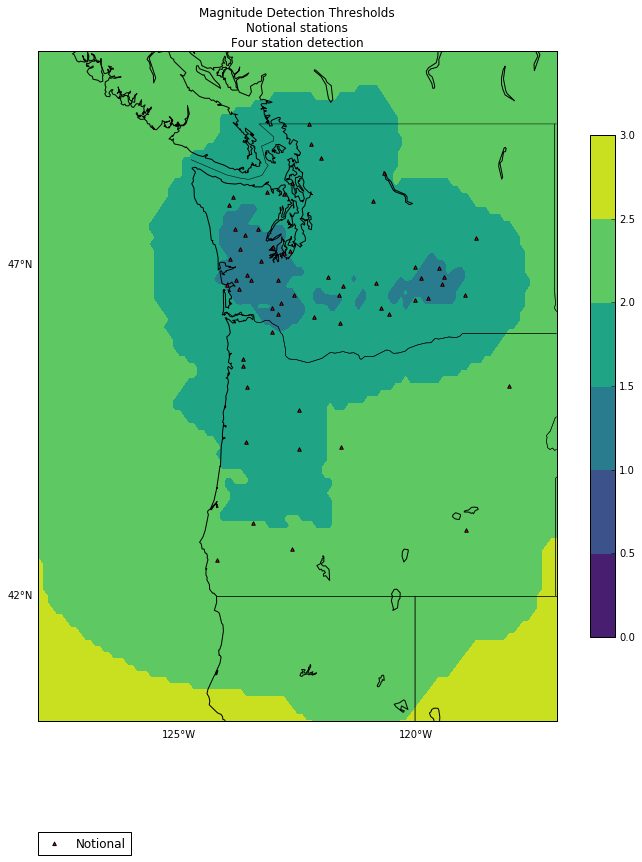

CPU times: user 2.69 s, sys: 50.8 ms, total: 2.75 s
Wall time: 2.76 s


In [29]:
# Perfomance 2 min 18 sec
path = grid_eew_notional.get_path()

%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'Notional stations' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

In [28]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_existing_and_notional"
grid_type = 'detection'

src = {}
src['existing_sm'] = data_srcs['existing_sm']
src['existing_bb'] = data_srcs['existing_bb']
src['notional'] = data_srcs['notional']
%time grid_eew_existing_and_notional = make_grid(grid_type, src)
print(grid_eew_existing_and_notional.get_path())

JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
CPW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
GSM:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MEGW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PGO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PSNS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TAKO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TKCO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TOLO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31

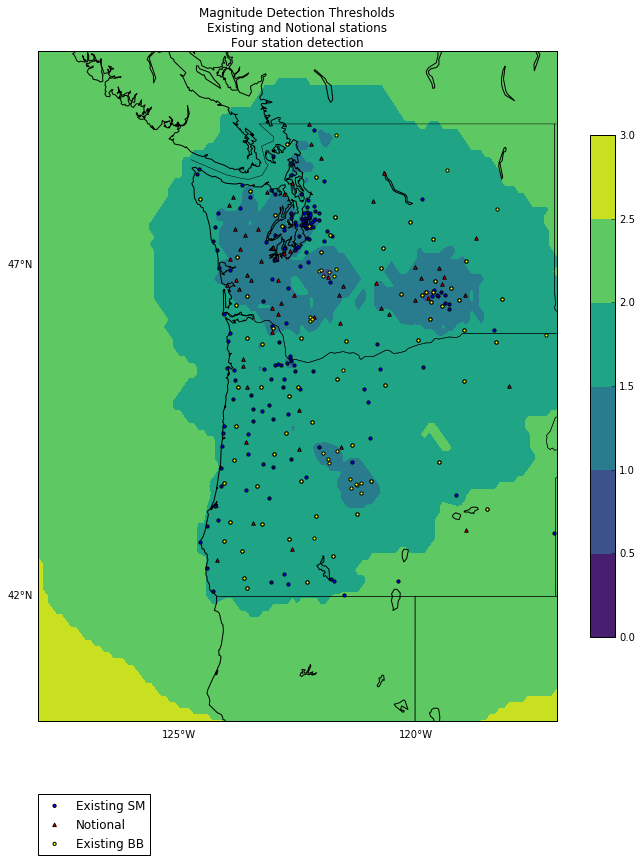

CPU times: user 2.73 s, sys: 35.3 ms, total: 2.77 s
Wall time: 2.77 s


In [45]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional.get_path()

%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'Existing and Notional stations' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

In [34]:
%time grid_eew_existing_and_notional_diff = grid_eew_existing_all.copy("diff_all_and_notional", "diff_all_and_notional")
%time grid_eew_existing_and_notional_diff.matrix = grid_eew_notional.matrix - grid_eew_existing_and_notional.matrix
%time grid_eew_existing_and_notional_diff.save()
print(grid_eew_existing_and_notional_diff.get_path())

CPU times: user 1.66 s, sys: 24.9 ms, total: 1.69 s
Wall time: 1.69 s
CPU times: user 178 µs, sys: 45 µs, total: 223 µs
Wall time: 180 µs
CPU times: user 263 ms, sys: 8.68 ms, total: 272 ms
Wall time: 274 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_and_notional/diff_all_and_notional_grid/140x150-res-0.1.pickle


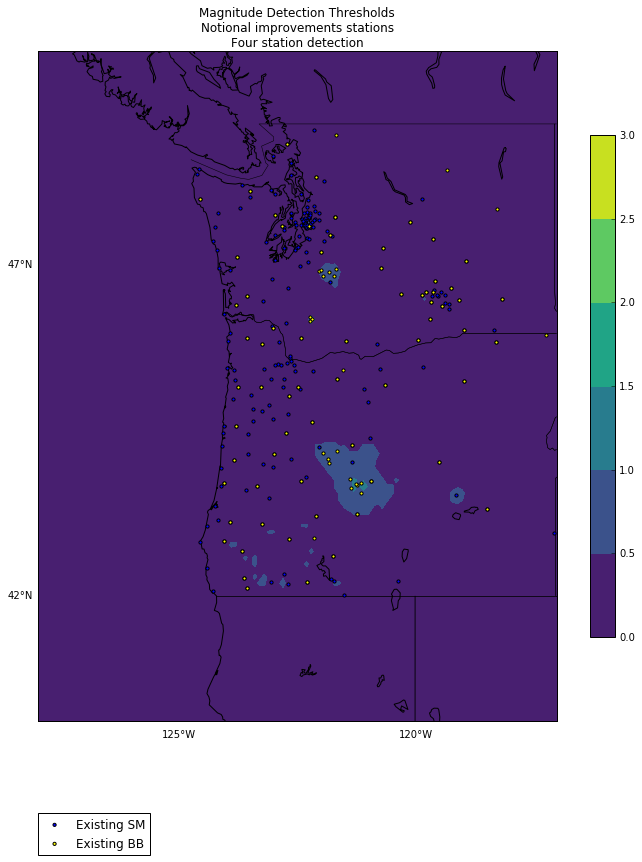

CPU times: user 2.81 s, sys: 39.6 ms, total: 2.85 s
Wall time: 2.85 s


In [38]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional_diff.get_path()

%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'Notional improvements stations' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3